In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3 as sql
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['khrismiddleton.csv']


In [2]:
# Entire Dataframe
df = pd.read_csv('../input/khrismiddleton.csv')

In [3]:
# Connect to SQL
conn = sql.connect("nba.db")
df.to_sql("khrismiddleton", conn)

In [4]:
# SQL query
sql_joint = '''
SELECT Oppo, ROUND(AVG(PTS),1) AS PPG, ROUND(AVG(FGM),1) AS FGM, ROUND(AVG(FGA),1) AS FGA, ROUND(AVG(FGM)/AVG(FGA) * 100, 1) AS "FG%", ROUND(AVG("3PM"),1) AS "3PM", ROUND(AVG("3PA"),1) AS "3PA", ROUND(AVG("3PM")/AVG("3PA") * 100,1) AS "3P%"
FROM khrismiddleton
GROUP BY Oppo
ORDER BY 1 DESC
'''

joint_df = pd.read_sql(sql_joint, conn)
joint_df

,Oppo,PPG,FGM,FGA,FG%,3PM,3PA,3P%
0,TOR,14.5,5.2,13.0,39.7,1.2,3.2,36.8
1,DET,19.0,6.0,13.0,46.2,2.8,6.0,45.8
2,BOS,24.1,9.1,15.8,57.7,3.9,6.1,63.6


In [5]:
# Set opponent team name as index
joint_df.set_index('Oppo')

,PPG,FGM,FGA,FG%,3PM,3PA,3P%
Oppo,,,,,,,
TOR,14.5,5.2,13.0,39.7,1.2,3.2,36.8
DET,19.0,6.0,13.0,46.2,2.8,6.0,45.8
BOS,24.1,9.1,15.8,57.7,3.9,6.1,63.6


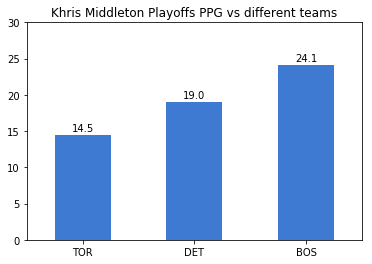

In [6]:
# Build bar plot, set bar color=#3F7AD2, title, x,y component, y limit
ax_ppg = joint_df.plot(kind='bar', facecolor='#3F7AD2', title='Khris Middleton Playoffs PPG vs different teams', x='Oppo', y='PPG', ylim=(0,30))

# Rotate x axis annotation
plt.xticks(rotation=0)

# Remove x label
ax_ppg.xaxis.set_label_text("")

# Remove legend
ax_ppg.get_legend().remove()

# Display y value on each bar
y_ppg = list(joint_df['PPG'])

for i,v in enumerate(y_ppg):
    plt.text(i, v + 0.5, str(v), color='black', ha='center')




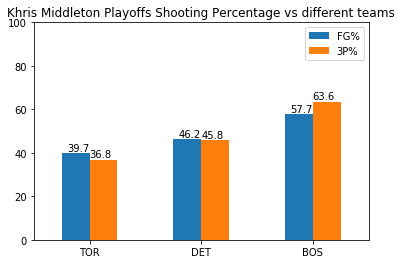

In [7]:
ax_shooting = joint_df.plot(kind='bar', title='Khris Middleton Playoffs Shooting Percentage vs different teams', x='Oppo', y=['FG%','3P%'], ylim=(0,100))

# Rotate x axis annotation
plt.xticks(rotation=0)

# Remove x label
ax_shooting.xaxis.set_label_text("")

# Remove legend
# ax_shooting.get_legend().remove()

# Display y value on each bar
y_fg = list(joint_df['FG%'])
y_3p = list(joint_df['3P%'])

for i,v in enumerate(y_fg):
    plt.text(i, v + 1, str(v), color='black', ha='right')
for i,v in enumerate(y_3p):
    plt.text(i, v + 1, str(v), color='black', ha='left')
